In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
mask=np.ones_like(df.corr())

In [78]:
tri=np.triu(mask)

In [79]:
tri

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

<IPython.core.display.Javascript object>


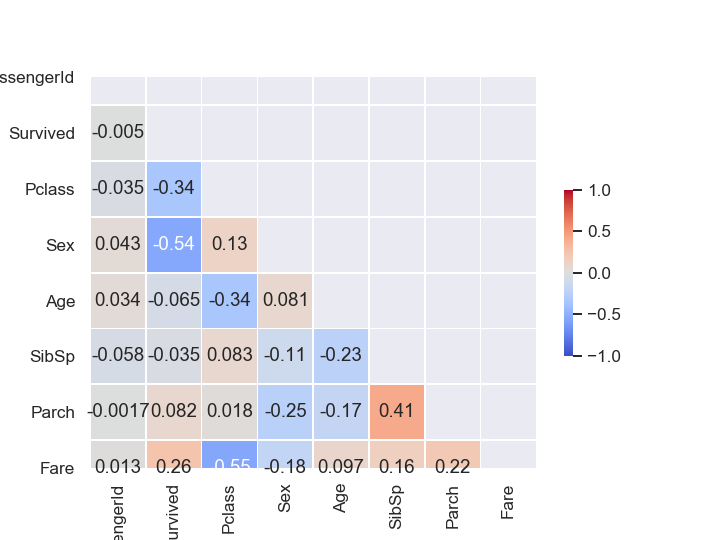

In [80]:
%matplotlib notebook
sns.heatmap(df.corr(),mask=tri,square = True,
                      linewidths = .5,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .4, 
                               "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

In [64]:
df['Sex'].replace(to_replace=["male","female"],value=[1,0],inplace=True)

In [67]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
df['Age'].fillna(df['Age'].median(), inplace = True)

<IPython.core.display.Javascript object>


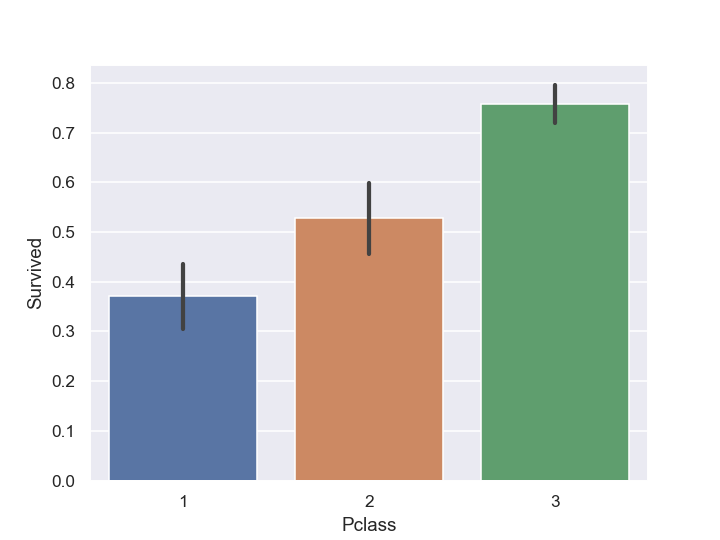

In [75]:
plt.figure()
sns.barplot(x=df['Pclass'],y=1-df['Survived'])
plt.show()

<IPython.core.display.Javascript object>


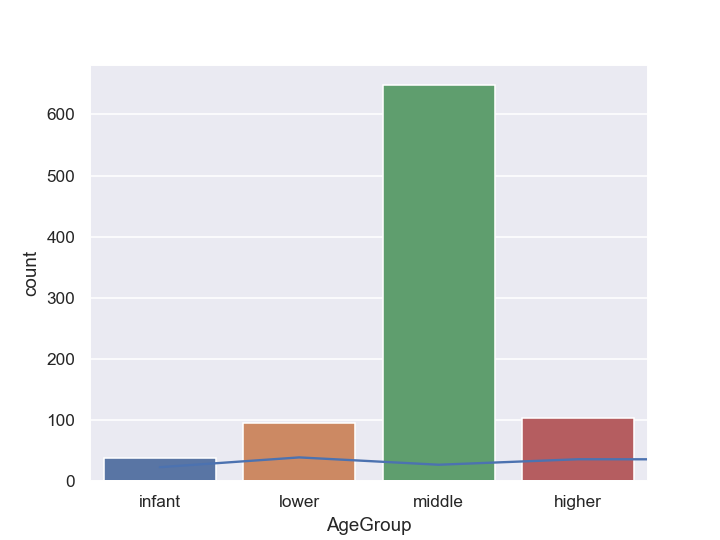

([<matplotlib.axis.XTick at 0x1f66c93ce48>,
 <a list of 2 Text xticklabel objects>)

In [96]:
plt.figure()
sns.barplot(x=df['Sex'],y=1-df['Survived'])
plt.show()
plt.ylabel("Deaths")
plt.xticks(ticks=[0,1],labels=['Female','Male'])

In [91]:
import plotly.express as plty

In [97]:
plty.bar(x='Parch',y='Survived',data_frame=df,)


In [108]:
plty.histogram(x=df['Age'],nbins=80,barmode='group')

In [124]:
bins=[1,5,18,45,100]
x=pd.cut(df['Age'],bins=bins,include_lowest=True,labels=['infant',"lower",'middle','higher'])
df1=pd.concat((df,x),axis=1)

In [128]:
df1.columns=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup']

<IPython.core.display.Javascript object>


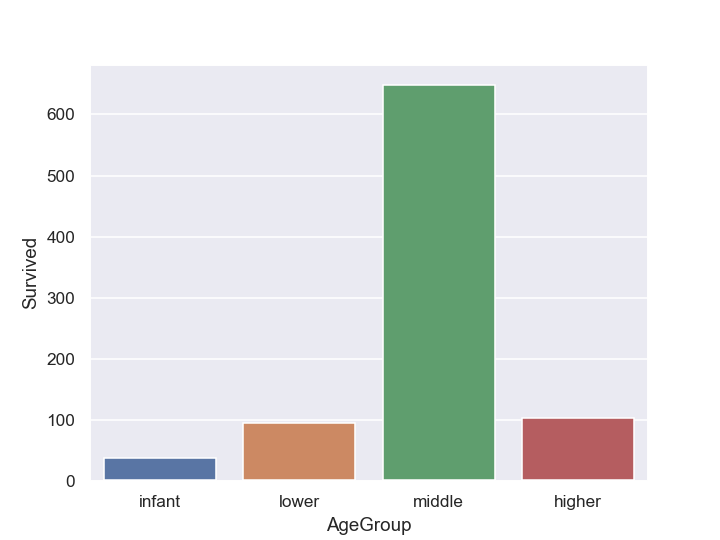

In [131]:
plt.figure()
sns.countplot(x='AgeGroup',data=df1)

<IPython.core.display.Javascript object>


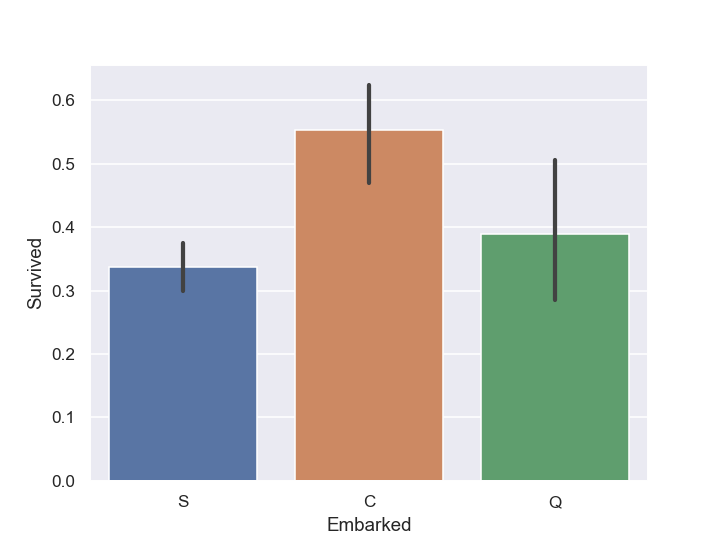

In [136]:
plt.figure()
sns.barplot(x=df1['Embarked'],y=df1['Survived'])


In [144]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,middle
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,middle
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,middle
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,middle
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,middle


In [145]:
features=["Pclass",'Sex','SibSp','Parch','Embarked','AgeGroup']
train=df1[features]
train_labels=df1['Survived']

In [146]:
train.reset_index(inplace=True,drop=True)

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup
0,3,1,1,0,S,middle
1,1,0,1,0,C,middle
2,3,0,0,0,S,middle
3,1,0,1,0,S,middle
4,3,1,0,0,S,middle
...,...,...,...,...,...,...
886,2,1,0,0,S,middle
887,1,0,0,0,S,middle
888,3,0,1,2,S,middle
889,1,1,0,0,C,middle


In [148]:
train_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64